In [6]:
# method for finding peaks of multiple velocity signals

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import signal
import scipy.fftpack

In [7]:
# load files into arrays

files = []
for number in range(5):
    files.append("Signal0%s.txt" %(number+1))
    
data = pd.concat([pd.read_csv(item, names=[item[:-4]], sep=" ", header=None) for item in files], axis=1)

In [8]:
# define domains

fs = 128
Ts = 1/fs
N = data['Signal01'].size
t = np.linspace(0,N*Ts,N)

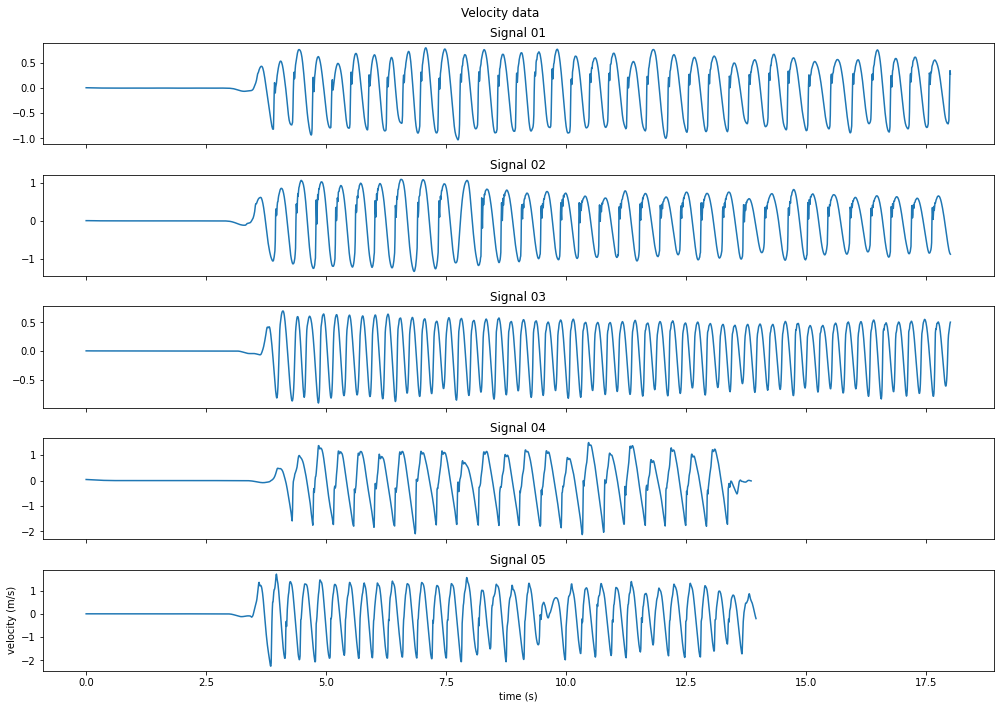

In [9]:
# plot signal 1 time domain data

x1 = data['Signal01'].values.tolist()
x2 = data['Signal02'].values.tolist()
x3 = data['Signal03'].values.tolist()
x4 = data['Signal04'].values.tolist()
x5 = data['Signal05'].values.tolist()

# subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Velocity data')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 1
ax1.plot(t, x1)
ax1.set_title('Signal 01')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 2
ax2.plot(t, x2)
ax2.set_title('Signal 02')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 3
ax3.plot(t, x3)
ax3.set_title('Signal 03')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 4
ax4.plot(t, x4)
ax4.set_title('Signal 04')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 5
ax5.plot(t, x5)
ax5.set_title('Signal 05')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

plt.tight_layout()
#plt.figure(figsize=(14, 5))
plt.show()

In [10]:
# detect min/max peaks of unfiltered signal
# find min/max with signal.argrelextrema()

# Find peaks(max).
peak_indexes = signal.argrelextrema(x1, np.greater)
peak_indexes = peak_indexes[0]
 
# Find valleys(min).
valley_indexes = signal.argrelextrema(x1, np.less)
valley_indexes = valley_indexes[0]
 
# Plot main graph.
(fig, ax) = plt.subplots(figsize=(14,5))
ax.plot(t, x1)
 
# Plot peaks.
peak_x = peak_indexes*Ts
peak_y = x1[peak_indexes]
ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='green', label="Peaks")
 
# Plot valleys.
valley_x = valley_indexes*Ts
valley_y = x1[valley_indexes]
ax.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='red', label="Valleys")

# trouble getting min/max alg to work for unfiltered signal

AttributeError: 'list' object has no attribute 'shape'

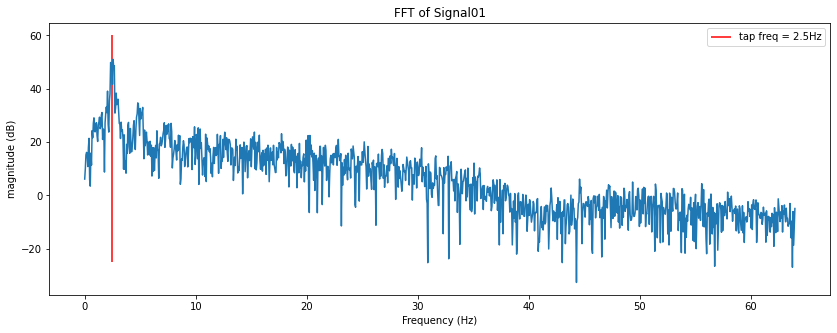

In [11]:
# select tapping frequency by checking fft of signal 01

X1 = scipy.fft.fft(x1[:N])
X_mag = np.absolute(X1)        # spectral magnitude
f = np.linspace(0, fs, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of Signal01')
plt.plot(f[:int(N/2)], 20*np.log10(X_mag[:int(N/2)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('magnitude (dB)')
plt.vlines(2.5,-25,60,colors='r',label='tap freq = 2.5Hz')
plt.legend()

# checked other signals to verify

Text(0, 0.5, 'magnitude (dB)')

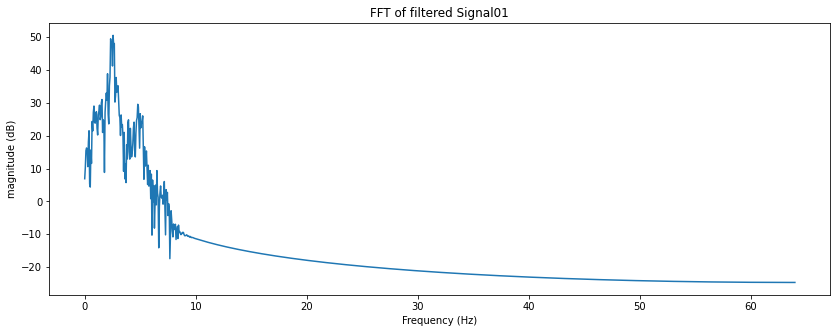

In [12]:
# filter signals using a lowpass filter at 5Hz

h = signal.firwin(101,cutoff=5,width=11,window='hamming',pass_zero='lowpass',fs=fs)

y1 = np.convolve(x1,h,'same')
y2 = np.convolve(x2,h,'same')
y3 = np.convolve(x3,h,'same')
y4 = np.convolve(x4,h,'same')
y5 = np.convolve(x5,h,'same')

# plot fft of filtered signal01 for comparison
X1f = scipy.fft.fft(y1[:N])
X_mag = np.absolute(X1f)        # spectral magnitude
f = np.linspace(0, fs, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of filtered Signal01')
plt.plot(f[:int(N/2)], 20*np.log10(X_mag[:int(N/2)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('magnitude (dB)')

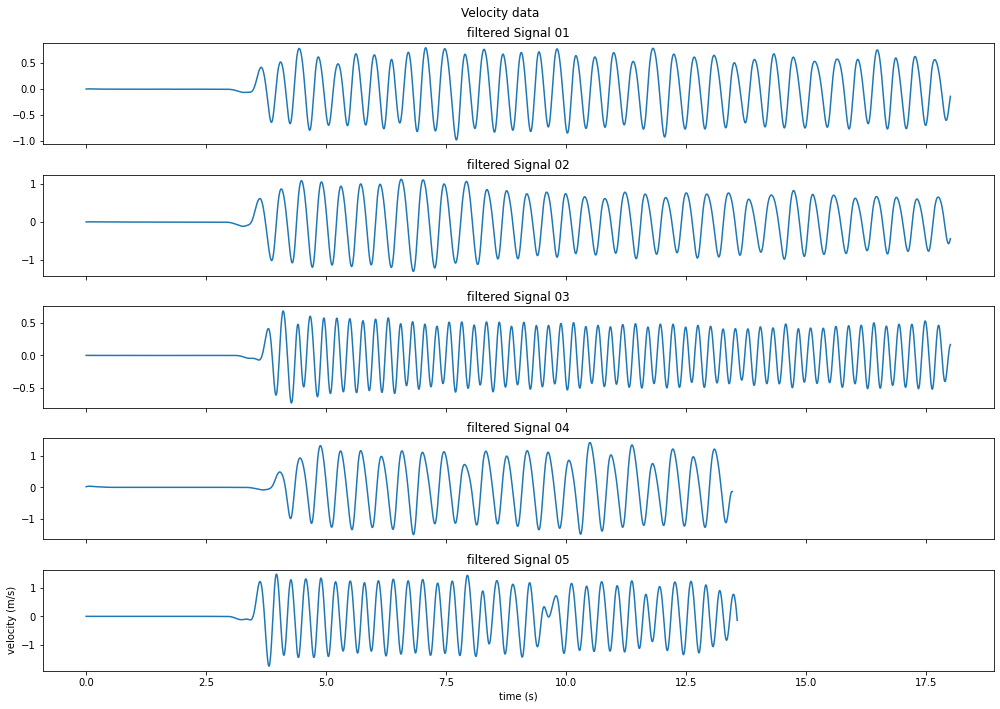

In [13]:
# plot time domain of filtered signals

# subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Velocity data')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 1
ax1.plot(t, y1)
ax1.set_title('filtered Signal 01')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 2
ax2.plot(t, y2)
ax2.set_title('filtered Signal 02')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 3
ax3.plot(t, y3)
ax3.set_title('filtered Signal 03')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 4
ax4.plot(t, y4)
ax4.set_title('filtered Signal 04')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

# sig 5
ax5.plot(t, y5)
ax5.set_title('filtered Signal 05')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

plt.tight_layout()
#plt.figure(figsize=(14, 5))
plt.show()

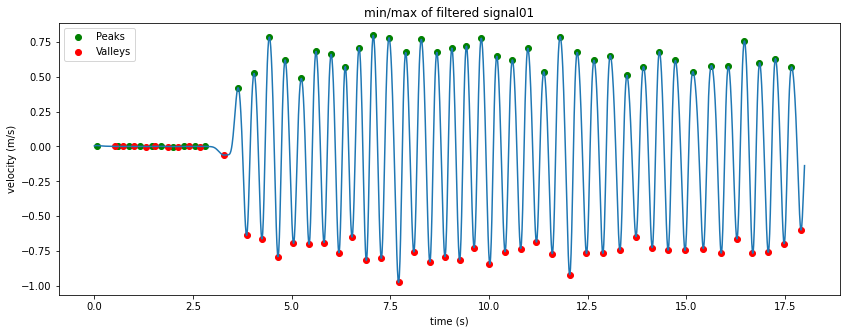

In [14]:
# find min/max with signal.argrelextrema()
# filtered signal 01

# find max
peak_indexes = signal.argrelextrema(y1, np.greater)
peak_indexes = peak_indexes[0]
 
# find min
valley_indexes = signal.argrelextrema(y1, np.less)
valley_indexes = valley_indexes[0]
 
# plot
(fig, ax) = plt.subplots(figsize=(14,5))
plt.title('min/max of filtered signal01')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
ax.plot(t, y1)
 
# plot max
peak_x = peak_indexes*Ts
peak_y = y1[peak_indexes]
ax.scatter(peak_x, peak_y, marker='o', color='green', label="Peaks")
 
# plot min
valley_x = valley_indexes*Ts
valley_y = y1[valley_indexes]
ax.scatter(valley_x, valley_y, marker='o', color='red', label="Valleys")

plt.legend()

In [37]:
mdiff = []*len(valley_indexes)

for k in range(len(valley_indexes)):
    mdiff = y1[peak_indexes] - (-1)*y1[valley_indexes]

ValueError: operands could not be broadcast together with shapes (41,) (40,) 

In [36]:
# plot min/max differences for signal01
z = [0]

if len(peak_indexes) < len(valley_indexes):
    peak_indexes.append(z)
elif len(valley_indexes) < len(peak_indexes):
    valley_indexes.append(z)

mdiff = y1[peak_indexes] - (-1)*y1[valley_indexes]

AttributeError: 'numpy.ndarray' object has no attribute 'append'

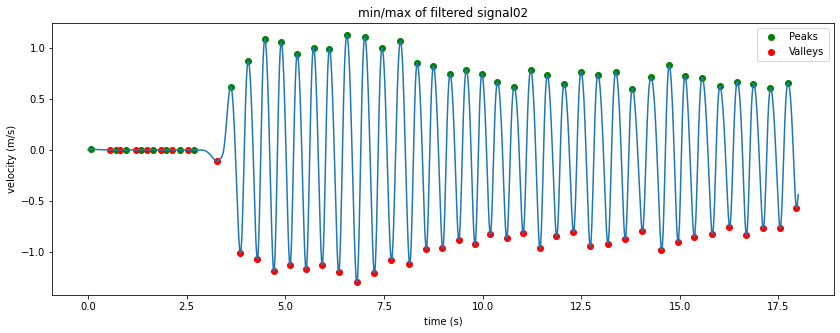

In [15]:
# filtered signal 02

# find max
peak_indexes = signal.argrelextrema(y2, np.greater)
peak_indexes = peak_indexes[0]
 
# find min
valley_indexes = signal.argrelextrema(y2, np.less)
valley_indexes = valley_indexes[0]
 
# plot
(fig, ax) = plt.subplots(figsize=(14,5))
plt.title('min/max of filtered signal02')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
ax.plot(t, y2)
 
# plot max
peak_x = peak_indexes*Ts
peak_y = y2[peak_indexes]
ax.scatter(peak_x, peak_y, marker='o', color='green', label="Peaks")
 
# plot min
valley_x = valley_indexes*Ts
valley_y = y2[valley_indexes]
ax.scatter(valley_x, valley_y, marker='o', color='red', label="Valleys")

plt.legend()

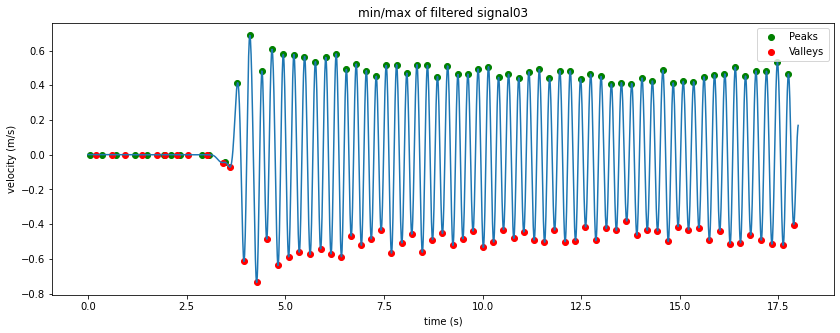

In [16]:
# filtered signal 03

# find max
peak_indexes = signal.argrelextrema(y3, np.greater)
peak_indexes = peak_indexes[0]
 
# find min
valley_indexes = signal.argrelextrema(y3, np.less)
valley_indexes = valley_indexes[0]
 
# plot
(fig, ax) = plt.subplots(figsize=(14,5))
plt.title('min/max of filtered signal03')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
ax.plot(t, y3)
 
# plot max
peak_x = peak_indexes*Ts
peak_y = y3[peak_indexes]
ax.scatter(peak_x, peak_y, marker='o', color='green', label="Peaks")
 
# plot min
valley_x = valley_indexes*Ts
valley_y = y3[valley_indexes]
ax.scatter(valley_x, valley_y, marker='o', color='red', label="Valleys")

plt.legend()

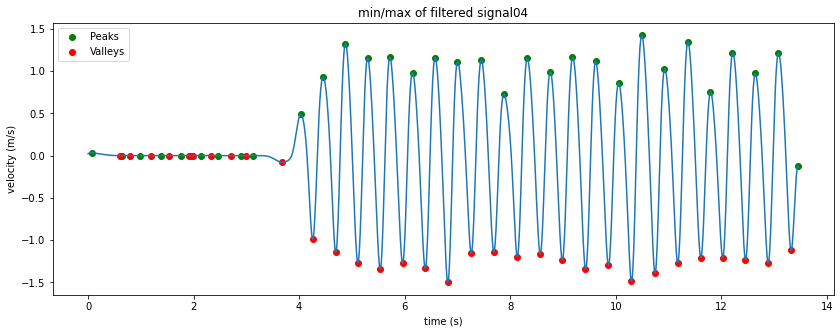

In [17]:
# filtered signal 04

# find max
peak_indexes = signal.argrelextrema(y4, np.greater)
peak_indexes = peak_indexes[0]
 
# find min
valley_indexes = signal.argrelextrema(y4, np.less)
valley_indexes = valley_indexes[0]
 
# plot
(fig, ax) = plt.subplots(figsize=(14,5))
plt.title('min/max of filtered signal04')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
ax.plot(t, y4)
 
# plot max
peak_x = peak_indexes*Ts
peak_y = y4[peak_indexes]
ax.scatter(peak_x, peak_y, marker='o', color='green', label="Peaks")
 
# plot min
valley_x = valley_indexes*Ts
valley_y = y4[valley_indexes]
ax.scatter(valley_x, valley_y, marker='o', color='red', label="Valleys")

plt.legend()

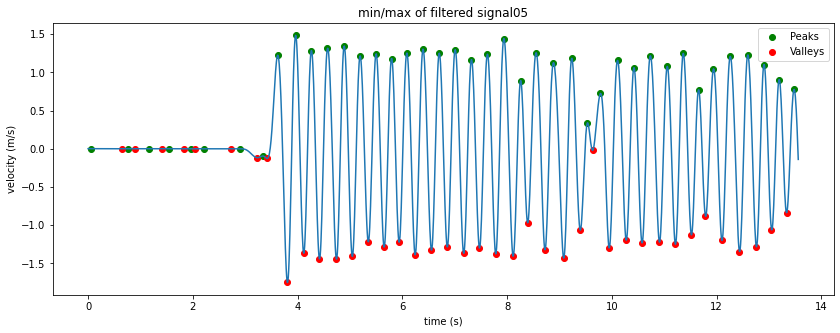

In [18]:
# filtered signal 05

# find max
peak_indexes = signal.argrelextrema(y5, np.greater)
peak_indexes = peak_indexes[0]
 
# find min
valley_indexes = signal.argrelextrema(y5, np.less)
valley_indexes = valley_indexes[0]
 
# plot
(fig, ax) = plt.subplots(figsize=(14,5))
plt.title('min/max of filtered signal05')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
ax.plot(t, y5)
 
# plot max
peak_x = peak_indexes*Ts
peak_y = y5[peak_indexes]
ax.scatter(peak_x, peak_y, marker='o', color='green', label="Peaks")
 
# plot min
valley_x = valley_indexes*Ts
valley_y = y5[valley_indexes]
ax.scatter(valley_x, valley_y, marker='o', color='red', label="Valleys")

plt.legend()